# Retail Business Performance & Profitability Analysis
**Objective**: Analyze sales and profitability across branches and product lines using Python.
**Tools**: Python (Pandas, Seaborn)
**Dataset**: SuperMarket Analysis.csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SuperMarket Analysis.csv to SuperMarket Analysis.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('SuperMarket Analysis.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [5]:
df = df.drop_duplicates()
df.dropna(inplace=True)
df.shape

(1000, 17)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month_name'] = df['Date'].dt.strftime('%B')

In [8]:

print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'Month_name'],
      dtype='object')


In [10]:
df.columns = df.columns.str.strip()

In [13]:
print(df.columns.tolist())

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Month', 'Month_name']


                             Sales  gross income
Product line                                    
Food and beverages      56144.8440     2673.5640
Sports and travel       55122.8265     2624.8965
Electronic accessories  54337.5315     2587.5015
Fashion accessories     54305.8950     2585.9950
Home and lifestyle      53861.9130     2564.8530
Health and beauty       49193.7390     2342.5590


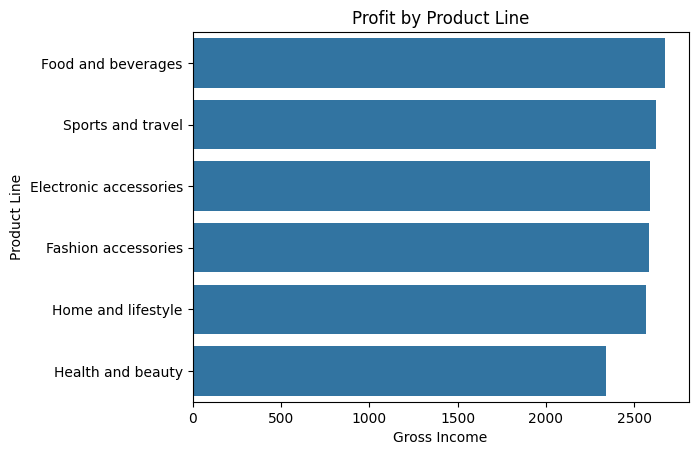

In [14]:
product_summary = df.groupby('Product line')[['Sales', 'gross income']].sum().sort_values(by='gross income', ascending=False)
print(product_summary)

sns.barplot(data=product_summary.reset_index(), x='gross income', y='Product line')
plt.title("Profit by Product Line")
plt.xlabel("Gross Income")
plt.ylabel("Product Line")
plt.show()


              Sales  gross income
Branch                           
Giza    110568.7065     5265.1765
Alex    106200.3705     5057.1605
Cairo   106197.6720     5057.0320


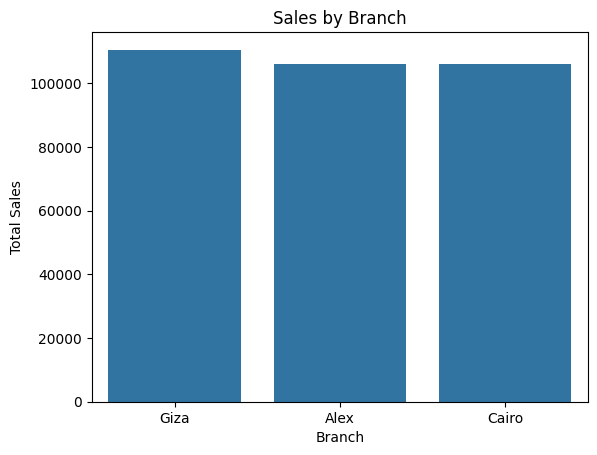

In [16]:
branch_summary = df.groupby('Branch')[['Sales', 'gross income']].sum().sort_values(by='Sales', ascending=False)
print(branch_summary)

sns.barplot(data=branch_summary.reset_index(), x='Branch', y='Sales')
plt.title("Sales by Branch")
plt.ylabel("Total Sales")
plt.xlabel("Branch")
plt.show()


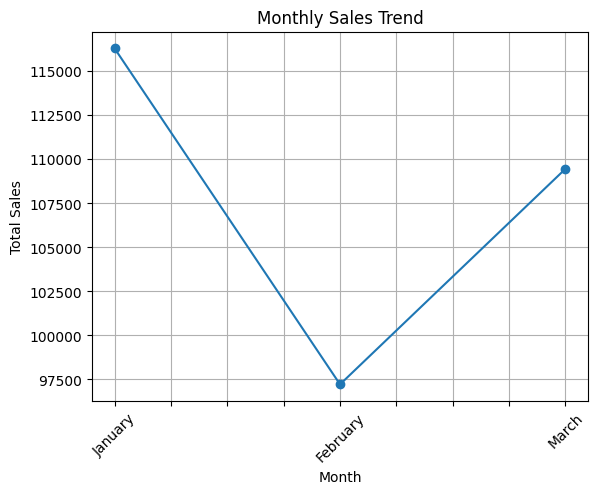

In [17]:
monthly_sales = df.groupby('Month_name')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

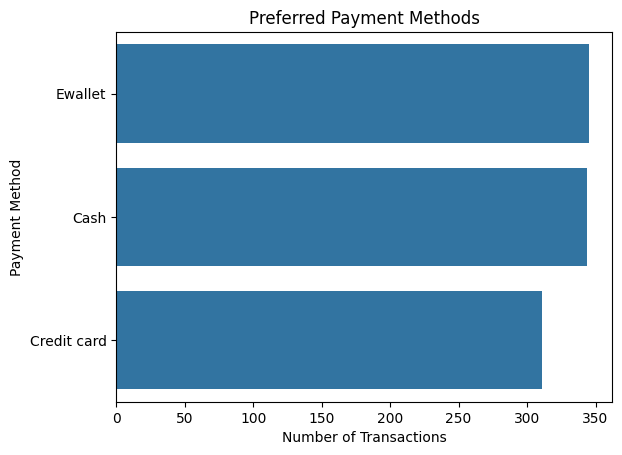

In [18]:
payment_counts = df['Payment'].value_counts()

sns.barplot(x=payment_counts.values, y=payment_counts.index)
plt.title("Preferred Payment Methods")
plt.xlabel("Number of Transactions")
plt.ylabel("Payment Method")
plt.show()


In [20]:
df.to_csv("cleaned_retail_data.csv", index=False)
print("Cleaned dataset exported successfully for Power BI.")


Cleaned dataset exported successfully for Power BI.


In [21]:
df.to_csv("cleaned_retail_data.csv", index=False)


In [22]:
from google.colab import files
files.download('cleaned_retail_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>